In [4]:
library("AzureML")
ws <- workspace()
auto.price <- download.datasets(ws, "Automobile price data (Raw)")

In [5]:
summary(auto.price)

   symboling       normalized.losses      make            fuel.type        
 Min.   :-2.0000   Length:205         Length:205         Length:205        
 1st Qu.: 0.0000   Class :character   Class :character   Class :character  
 Median : 1.0000   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 0.8341                                                           
 3rd Qu.: 2.0000                                                           
 Max.   : 3.0000                                                           
  aspiration        num.of.doors        body.style        drive.wheels      
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

In [6]:
str(auto.price)

'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.of.

In [7]:
clean.auto = function(auto.price){
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  auto.price[complete.cases(auto.price),]
}

auto.price = clean.auto(auto.price)

Warning message:
In lapply(auto.price[, numcols], as.numeric): NAs introduced by coercionWarning message:
In lapply(auto.price[, numcols], as.numeric): NAs introduced by coercionWarning message:
In lapply(auto.price[, numcols], as.numeric): NAs introduced by coercionWarning message:
In lapply(auto.price[, numcols], as.numeric): NAs introduced by coercionWarning message:
In lapply(auto.price[, numcols], as.numeric): NAs introduced by coercion

In [8]:
str(auto.price)

'data.frame':	195 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

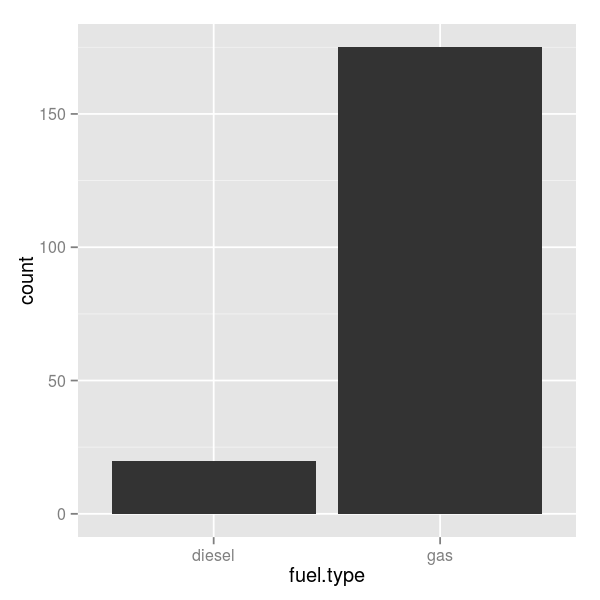

In [9]:
require(ggplot2)
require(repr)
options(repr.plat.width=7, repr.plot.height=5)
ggplot(auto.price, aes(fuel.type)) + geom_bar()

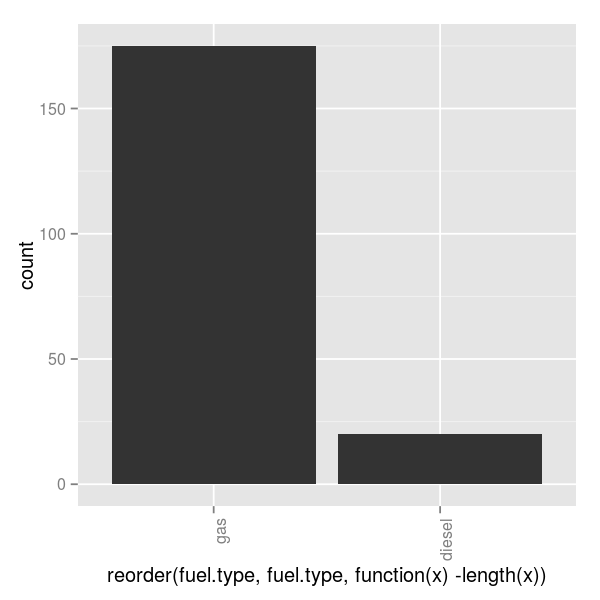

In [10]:
ggplot(auto.price, aes(x=reorder(fuel.type,fuel.type, function(x)-length(x)))) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust =1))

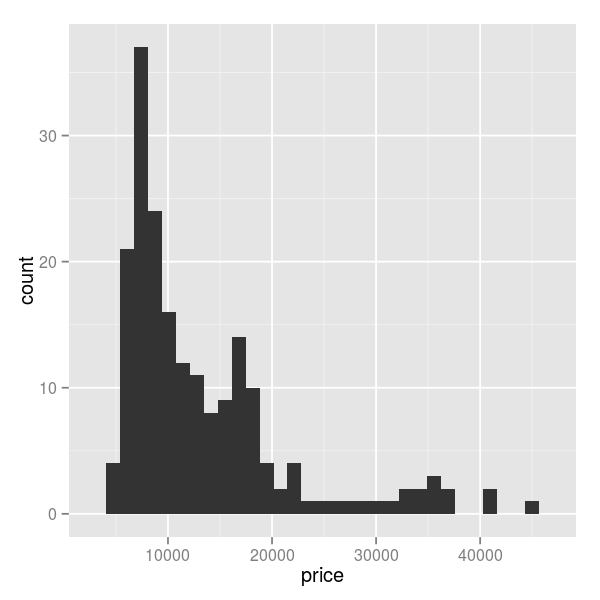

In [11]:
ggplot(auto.price, aes(price)) + geom_histogram()

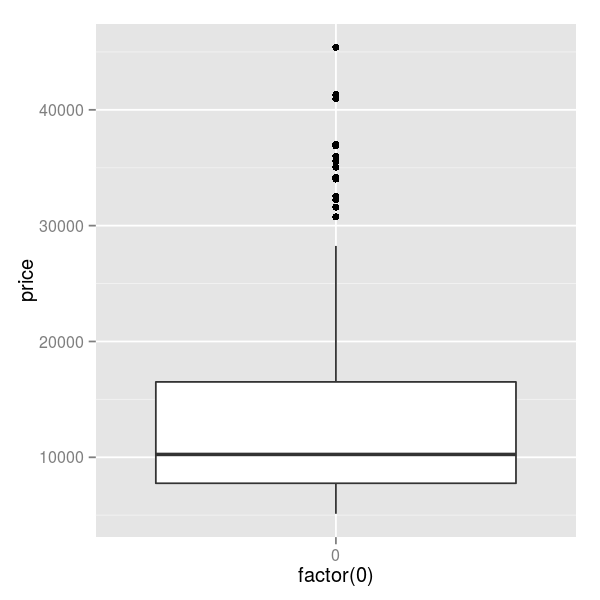

In [12]:
ggplot(auto.price, aes(x = factor(0), y = price)) + geom_boxplot()

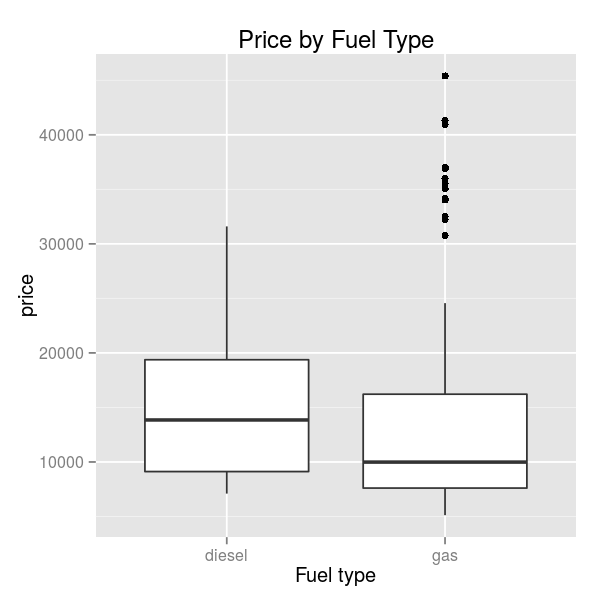

In [13]:
ggplot(auto.price, aes(x = factor(fuel.type), y = price)) + geom_boxplot() + xlab('Fuel type') + ggtitle('Price by Fuel Type')

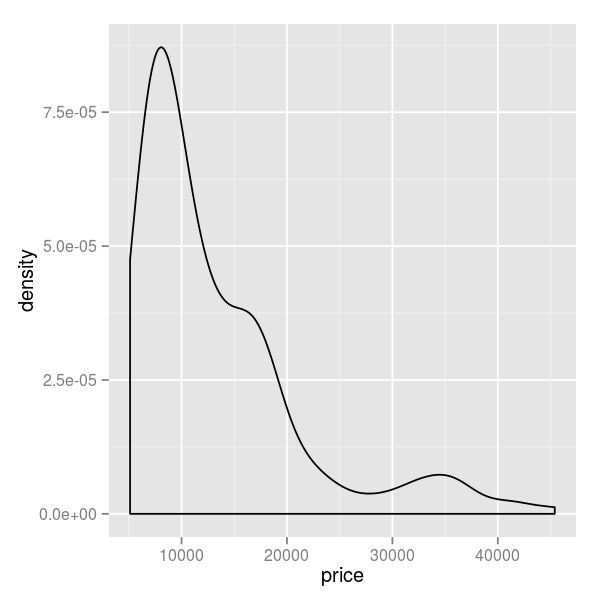

In [14]:
ggplot(auto.price, aes(price)) + geom_density()

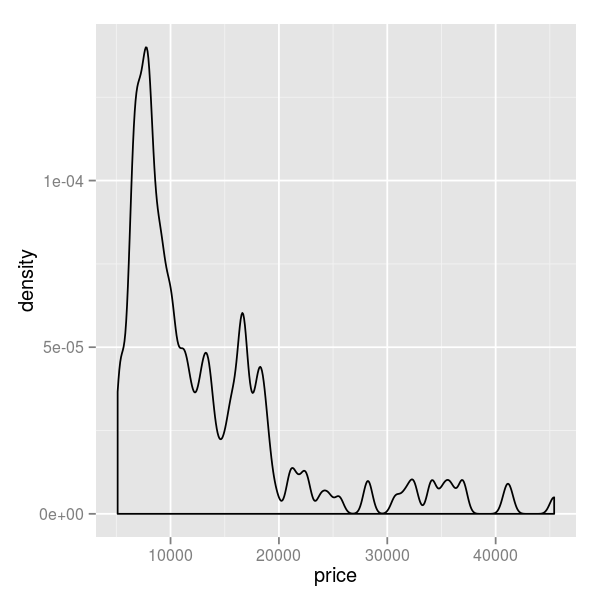

In [15]:
ggplot(auto.price, aes(price)) + geom_density(adjust = 1/5)

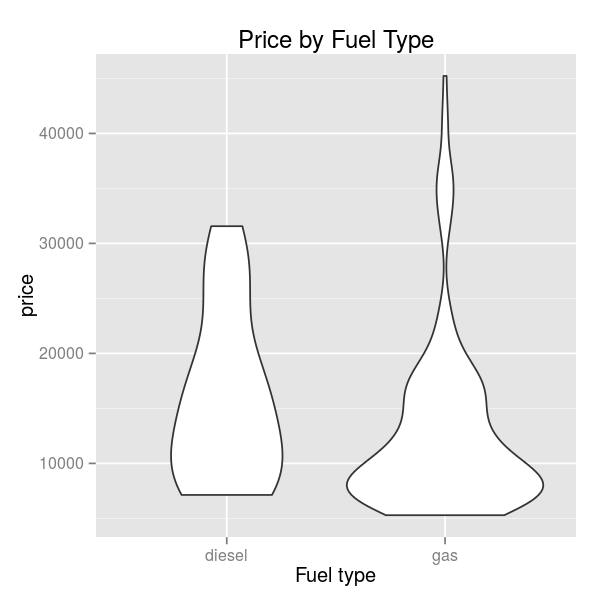

In [16]:
ggplot(auto.price, aes(x = factor(fuel.type), y = price)) + geom_violin(trim = TRUE, draw_quantiles = c(0.25, 0.5, 0.75)) + xlab('Fuel type') + ggtitle('Price by Fuel Type')

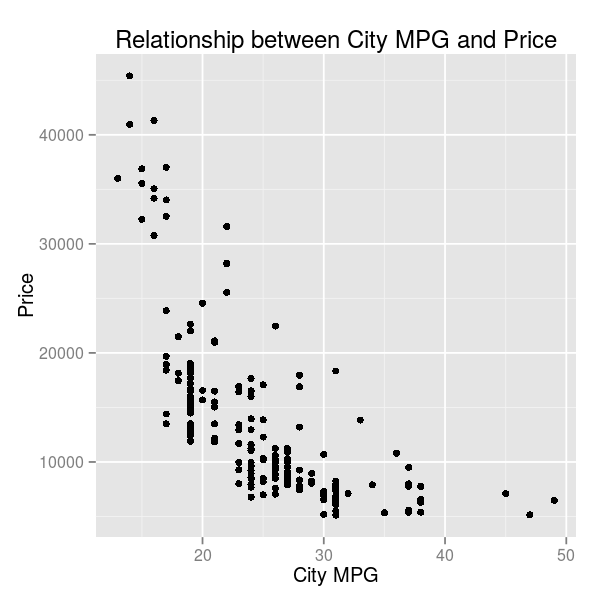

In [17]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(auto.price, aes(city.mpg, price)) + geom_point() + xlab('City MPG') + ylab('Price') + ggtitle('Relationship between City MPG and Price')

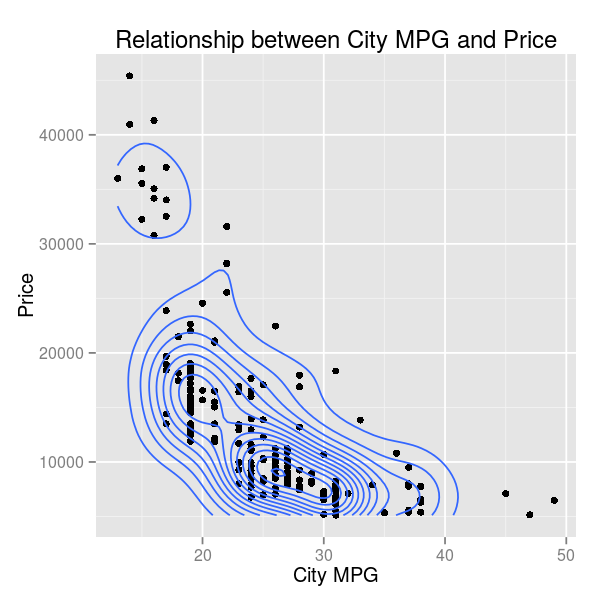

In [19]:
ggplot(auto.price, aes(city.mpg, price)) + geom_point() + geom_density2d() +xlab('City MPG') + ylab('Price') + ggtitle('Relationship between City MPG and Price')

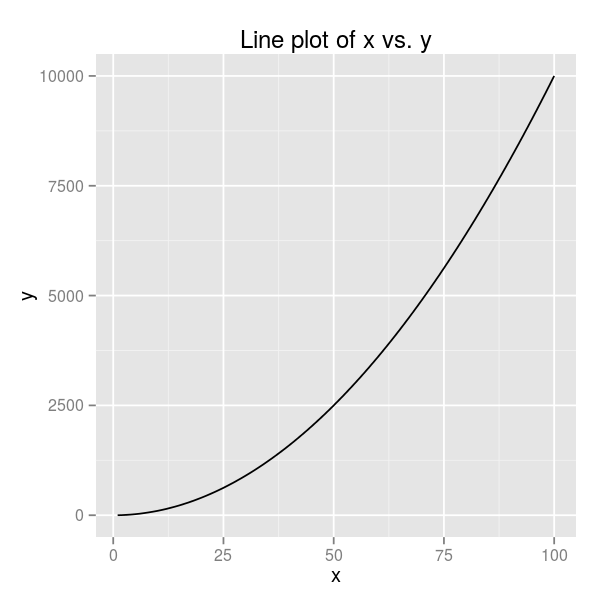

In [20]:
x = seq(1,100, length.out = 100)
df = data.frame(x = x, y = x^2)
ggplot(df, aes(x,y)) + geom_line() + ggtitle('Line plot of x vs. y')

In [22]:
summary(df)
str(df)

       x                y          
 Min.   :  1.00   Min.   :    1.0  
 1st Qu.: 25.75   1st Qu.:  663.2  
 Median : 50.50   Median : 2550.5  
 Mean   : 50.50   Mean   : 3383.5  
 3rd Qu.: 75.25   3rd Qu.: 5662.8  
 Max.   :100.00   Max.   :10000.0  

'data.frame':	100 obs. of  2 variables:
 $ x: num  1 2 3 4 5 6 7 8 9 10 ...
 $ y: num  1 4 9 16 25 36 49 64 81 100 ...


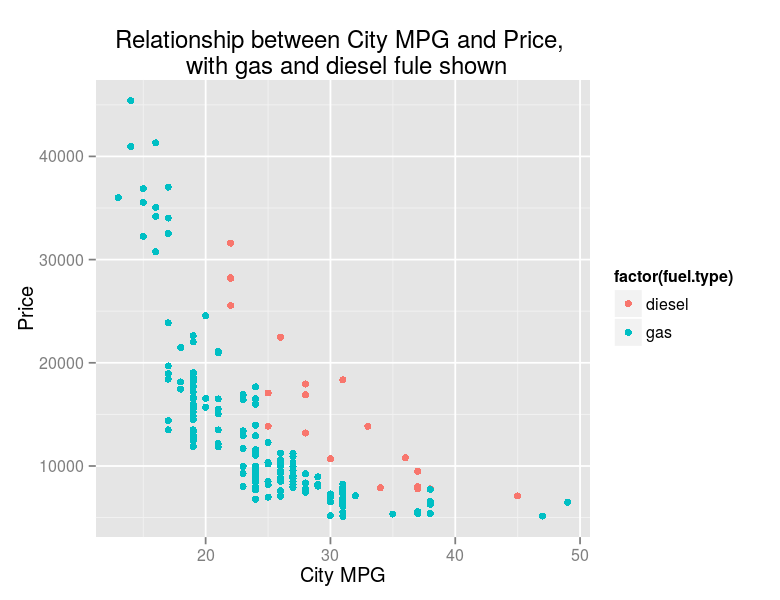

In [23]:
options(repr.plot.width=6.5, repr.plot.height=5)
ggplot(auto.price, aes(city.mpg, price)) + geom_point(aes(color = factor(fuel.type))) + xlab('City MPG') + ylab('Price') + ggtitle('Relationship between City MPG and Price, \n with gas and diesel fule shown')

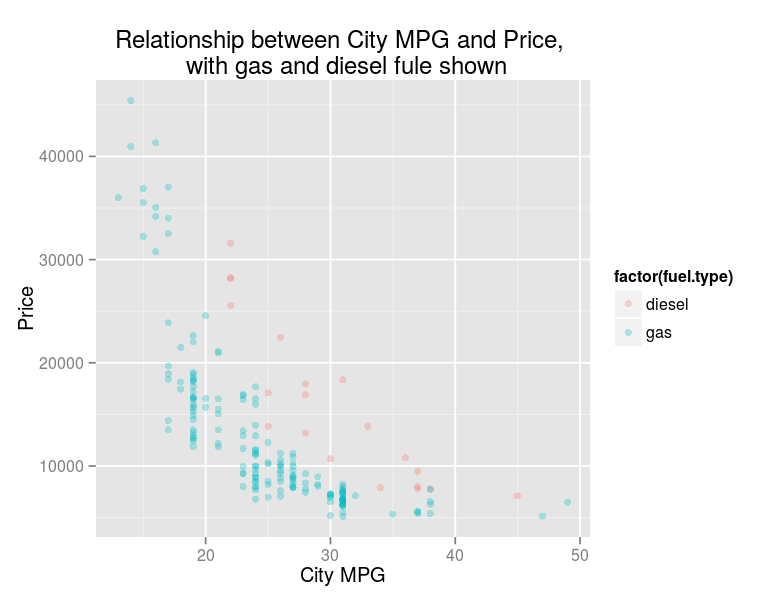

In [24]:
options(repr.plot.width=6.5, repr.plot.height=5)
ggplot(auto.price, aes(city.mpg, price)) + geom_point(aes(color = factor(fuel.type)), alpha = 0.3) + xlab('City MPG') + ylab('Price') + ggtitle('Relationship between City MPG and Price, \n with gas and diesel fule shown')

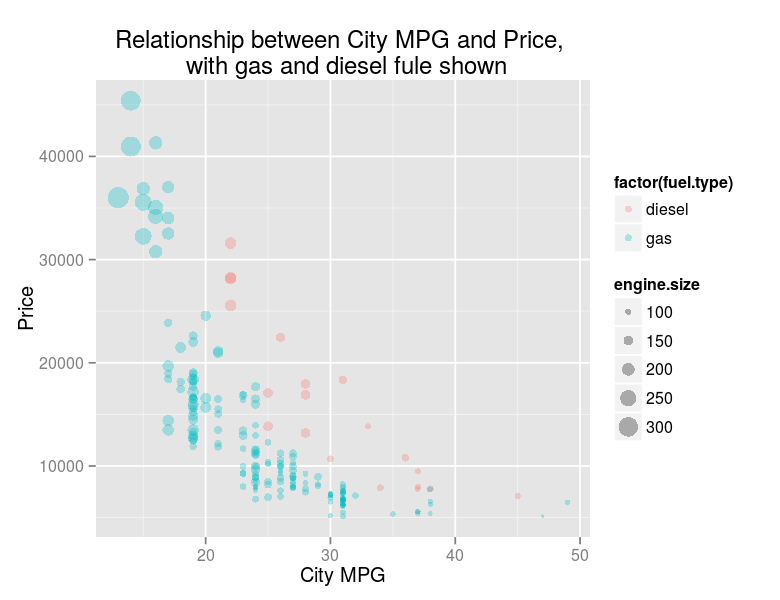

In [25]:
options(repr.plot.width=6.5, repr.plot.height=5)
ggplot(auto.price, aes(city.mpg, price)) + geom_point(aes(color = factor(fuel.type), size = engine.size), alpha = 0.3) + xlab('City MPG') + ylab('Price') + ggtitle('Relationship between City MPG and Price, \n with gas and diesel fule shown')

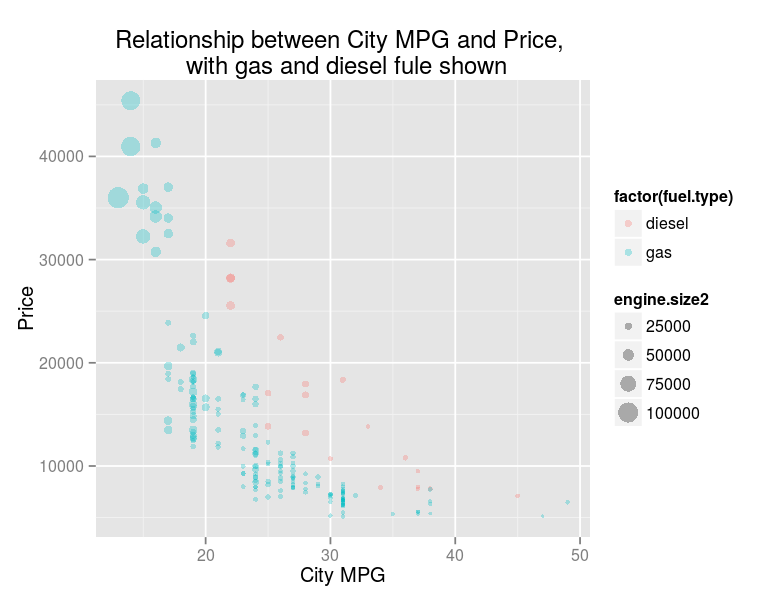

In [26]:
auto.price$engine.size2 = auto.price$engine.size^2
ggplot(auto.price, aes(city.mpg, price)) + geom_point(aes(color = factor(fuel.type), size = engine.size2), alpha = 0.3) + xlab('City MPG') + ylab('Price') + ggtitle('Relationship between City MPG and Price, \n with gas and diesel fule shown')

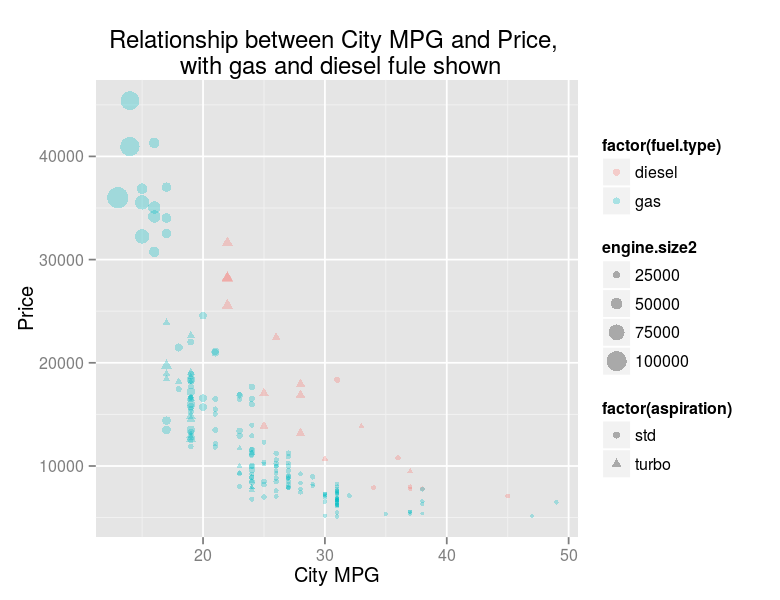

In [29]:
ggplot(auto.price, aes(city.mpg, price)) + geom_point(aes(color = factor(fuel.type), size = engine.size2, shape = factor(aspiration)), alpha = 0.3) + xlab('City MPG') + ylab('Price') + ggtitle('Relationship between City MPG and Price, \n with gas and diesel fule shown')

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/RtmpP3Wo73/downloaded_packages'


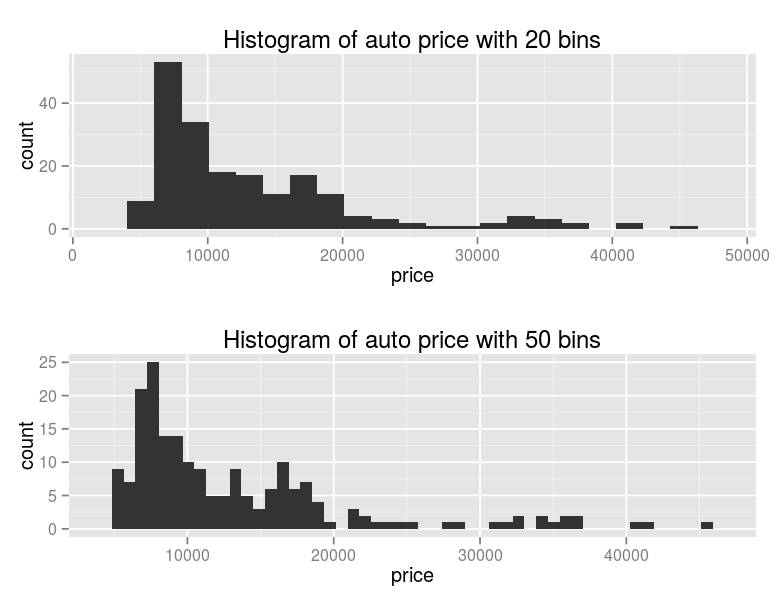

In [31]:
install.packages("gridExtra")
require(gridExtra)
bw1 = (max(auto.price$price) - min(auto.price$price))/20
bw2 = (max(auto.price$price) - min(auto.price$price))/50
require(gridExtra)
p1 = ggplot(auto.price, aes(price)) + geom_histogram(binwidth = bw1) + ggtitle('Histogram of auto price with 20 bins')
p2 = ggplot(auto.price, aes(price)) + geom_histogram(binwidth = bw2) + ggtitle('Histogram of auto price with 50 bins')

grid.arrange(p1, p2, nrow = 2)